# Model performance figures

In [20]:
import numpy as np
import pandas as pd
from itertools import islice
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
%matplotlib inline
plt.rcParams.update({'font.size': 14})

## Read in data

### DyGIE++
#### On PICKLE
First, read in the csv that contains the performances for all models (besides SeeDev) on PICKLE with no types:

In [21]:
dygiepp_no_labels_perf = pd.read_csv('/mnt/ufs18/home-118/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/15Jul2023_all_on_pickle_no_seedev_performance.csv')
dygiepp_no_labels_perf['model'] = dygiepp_no_labels_perf['pred_file'].str.split('_').str[-2]
dygiepp_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.193694,0.072919,0.105819,0.000000,0.000000,0.000000,"(0.1429979253112033, 0.2502936241610738)","(0.05333745205549978, 0.09474637681159417)","(0.07839296166227686, 0.13527554548482587)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",ace05-relation
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478968,0.674144,0.559745,0.057466,0.086344,0.068621,"(0.43032869912059807, 0.5308687868236084)","(0.6406513153003568, 0.7108491030638333)","(0.5190181925003347, 0.6002697495183045)","(0.03457632090684005, 0.08541554231822657)","(0.057188308886971524, 0.12067924528301884)","(0.044473370023383384, 0.09702656546489562)",scierc
3,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.557187,0.196518,0.289868,NaN,NaN,NaN,"(0.4912152530292231, 0.6242472804972805)","(0.1523317471518495, 0.24312158926383784)","(0.23576190476190473, 0.3419524854981555)",NaN,NaN,NaN,genia
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.589271,0.377282,0.459691,0.118089,0.023735,0.039048,"(0.5134214210792485, 0.6597671470822966)","(0.31619556173564173, 0.4429260106656407)","(0.3932587830568571, 0.5283259376302464)","(0.04967592592592593, 0.20930232558139536)","(0.007501830573391912, 0.04328817733990146)","(0.013247961852022767, 0.06758396923631556)",chemprot
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478597,0.656190,0.553169,0.072374,0.089572,0.079652,"(0.4294379741252424, 0.5316811214758135)","(0.6164612612449871, 0.691908914545175)","(0.5141514693449252, 0.5977567158569393)","(0.03612494415231811, 0.11568160175684078)","(0.04887108610567514, 0.13172888094778185)","(0.042886436544521116, 0.1180061037639878)",scierc-lightweight
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.570708,0.160570,0.249894,NaN,NaN,NaN,"(0.49902699456975774, 0.643936419763142)","(0.11667512308468143, 0.20724809293513485)","(0.19321837835989722, 0.3061844812816278)",NaN,NaN,NaN,genia-lightweight


Now read in the SeeDev performance with no labels:

In [22]:
seedev_no_labels_perf = pd.read_csv('../data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/17Jul2023_seedev_on_pickle_performance_no_labels.csv')
seedev_no_labels_perf['model'] = seedev_no_labels_perf['pred_file'].str.split('_').str[-2]
seedev_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.373344,0.314438,0.340887,0.167352,0.066984,0.094928,"(0.31789976918733104, 0.4304071630210769)","(0.26929228179228176, 0.35934436835687483)","(0.29586052643654476, 0.3803187764879307)","(0.04750056420672534, 0.349972186904005)","(0.017564797672573393, 0.14164540816326524)","(0.0264594334393325, 0.19697090527267153)",seedev


Now combine them:

In [23]:
dygiepp_no_labels_perf = pd.concat([dygiepp_no_labels_perf, seedev_no_labels_perf])
dygiepp_no_labels_perf = dygiepp_no_labels_perf.sort_values('ent_F1').reset_index(drop=True)
dygiepp_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.193694,0.072919,0.105819,0.000000,0.000000,0.000000,"(0.1429979253112033, 0.2502936241610738)","(0.05333745205549978, 0.09474637681159417)","(0.07839296166227686, 0.13527554548482587)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",ace05-relation
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.570708,0.160570,0.249894,NaN,NaN,NaN,"(0.49902699456975774, 0.643936419763142)","(0.11667512308468143, 0.20724809293513485)","(0.19321837835989722, 0.3061844812816278)",NaN,NaN,NaN,genia-lightweight
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.557187,0.196518,0.289868,NaN,NaN,NaN,"(0.4912152530292231, 0.6242472804972805)","(0.1523317471518495, 0.24312158926383784)","(0.23576190476190473, 0.3419524854981555)",NaN,NaN,NaN,genia
3,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.373344,0.314438,0.340887,0.167352,0.066984,0.094928,"(0.31789976918733104, 0.4304071630210769)","(0.26929228179228176, 0.35934436835687483)","(0.29586052643654476, 0.3803187764879307)","(0.04750056420672534, 0.349972186904005)","(0.017564797672573393, 0.14164540816326524)","(0.0264594334393325, 0.19697090527267153)",seedev
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.589271,0.377282,0.459691,0.118089,0.023735,0.039048,"(0.5134214210792485, 0.6597671470822966)","(0.31619556173564173, 0.4429260106656407)","(0.3932587830568571, 0.5283259376302464)","(0.04967592592592593, 0.20930232558139536)","(0.007501830573391912, 0.04328817733990146)","(0.013247961852022767, 0.06758396923631556)",chemprot
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478597,0.656190,0.553169,0.072374,0.089572,0.079652,"(0.4294379741252424, 0.5316811214758135)","(0.6164612612449871, 0.691908914545175)","(0.5141514693449252, 0.5977567158569393)","(0.03612494415231811, 0.11568160175684078)","(0.04887108610567514, 0.13172888094778185)","(0.042886436544521116, 0.1180061037639878)",scierc-lightweight
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478968,0.674144,0.559745,0.057466,0.086344,0.068621,"(0.43032869912059807, 0.5308687868236084)","(0.6406513153003568, 0.7108491030638333)","(0.5190181925003347, 0.6002697495183045)","(0.03457632090684005, 0.08541554231822657)","(0.057188308886971524, 0.12067924528301884)","(0.044473370023383384, 0.09702656546489562)",scierc
7,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle


Now, read in the performance for the models that we could evaluate with types; for PICKLE this is a true labeled evaluation, for ChemProt, SeeDev and GENIA, this is the mapped types evaluation. All of these are in separate CSV files; we want to comboine them for ease of use.

#### On original domain test set

In [24]:
all_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/17Jul2023_original_domain_application/performance/'
pick_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/'
original_dom_typed_eval_dygiepp_paths = {
    'chemprot': 'chemprot_on_original_test_with_types.csv',
    'scierc': 'scierc_on_original_test_with_types.csv',
    'genia': 'genia_on_original_test_with_types.csv',
    'seedev': 'seedev_on_original_test_with_types.csv',
    'pickle': '15Jul2023_PICKLE_on_pickle_TYPES_MAPPED_performance.csv'
}
original_dom_typed_eval_dygiepp_dfs = []
for dset, apath in original_dom_typed_eval_dygiepp_paths.items():
    if dset != 'pickle':
        df = pd.read_csv(f'{all_prefix_path}{apath}')
    else:
        df = pd.read_csv(f'{pick_prefix_path}{apath}')
    df['model'] = df['pred_file'].str.split('_').str[-2]
    original_dom_typed_eval_dygiepp_dfs.append(df)
original_dom_typed_eval_dygiepp_all_df = pd.concat(original_dom_typed_eval_dygiepp_dfs).sort_values('ent_F1').reset_index(drop=True)
original_dom_typed_eval_dygiepp_all_df

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_original_domain_seedev_15Jul2023_See...,15Jul2023_SeeDev_splits_from_train_dev_combine...,0.692900,0.635931,0.662974,0.303739,0.112787,0.163470,"(0.6663757197632532, 0.7188552415027959)","(0.5818926099851706, 0.6843352119892404)","(0.6204486722509356, 0.6936483611346058)","(0.23008536944362673, 0.388657357679914)","(0.07677894023587521, 0.1537619124349707)","(0.1187950406686984, 0.2100606580479137)",seedev
1,17Jul2023_original_domain_scierc_test_scierc-l...,test.json,0.656067,0.682640,0.669058,0.541761,0.414319,0.469362,"(0.6274365509584461, 0.6842844430754488)","(0.6526412801564667, 0.7116745894554883)","(0.6411644791514244, 0.6961459204823818)","(0.49061263110782466, 0.5905144789935912)","(0.3717942500115834, 0.4616557605226529)","(0.4285064277760907, 0.5137367851078481)",scierc-lightweight
2,17Jul2023_original_domain_scierc_test_scierc_p...,test.json,0.672740,0.691877,0.682142,0.555033,0.407451,0.469707,"(0.641666628419759, 0.7014408115162187)","(0.6593282121994167, 0.7219858156028369)","(0.6515108655371347, 0.7109833012665522)","(0.507274653993128, 0.6074004326593702)","(0.35917616334283, 0.45322609957910626)","(0.4233395261119466, 0.5124758750017109)",scierc
3,17Jul2023_original_domain_genia_test_genia-lig...,test.json,0.807781,0.720488,0.761615,NaN,NaN,NaN,"(0.7911665997410253, 0.8260072940405128)","(0.7000317353416939, 0.7421248277353953)","(0.7449555575725381, 0.7796279137165357)",NaN,NaN,NaN,genia-lightweight
4,17Jul2023_original_domain_genia_test_genia_pre...,test.json,0.784904,0.745789,0.764821,NaN,NaN,NaN,"(0.7698401807931807, 0.8024519792983974)","(0.7248492367327184, 0.7647229791410313)","(0.7495853199176374, 0.7812172860057477)",NaN,NaN,NaN,genia
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.786266,0.792469,0.789318,0.486484,0.278747,0.353623,"(0.7473052218389438, 0.8231816865902558)","(0.7588560429469521, 0.8209822471542008)","(0.755175417517722, 0.8201116040765001)","(0.4104739010989011, 0.5480600048537798)","(0.2235184099077288, 0.32700939874896756)","(0.2997287522603978, 0.39846161761679355)",pickle
6,17Jul2023_original_domain_chemprot_test_chempr...,test.jsonl,0.899349,0.910882,0.905072,0.542289,0.575168,0.558158,"(0.8909223873502103, 0.908145452955884)","(0.9017623126390173, 0.9198407775646356)","(0.8974148558842204, 0.9117091165602897)","(0.5070242779262563, 0.575644353024995)","(0.5451401067600291, 0.606205437469547)","(0.5256613379132664, 0.588154478984388)",chemprot


In [25]:
all_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/17Jul2023_original_domain_application/performance/'
pick_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/'
original_dom_no_label_eval_dygiepp_paths = {
    'chemprot': 'chemprot_on_original_test_withOUT_types.csv',
    'scierc': 'scierc_on_original_test_withOUT_types.csv',
    'genia': 'genia_on_original_test_withOUT_types.csv',
    'seedev': 'seedev_on_original_test_withOUT_types.csv',
    
}
original_dom_no_label_eval_dygiepp_dfs = []
for dset, apath in original_dom_no_label_eval_dygiepp_paths.items():
    df = pd.read_csv(f'{all_prefix_path}{apath}')
    df['model'] = df['pred_file'].str.split('_').str[-2]
    original_dom_no_label_eval_dygiepp_dfs.append(df)
original_dom_no_label_eval_dygiepp_all_df = pd.concat(original_dom_no_label_eval_dygiepp_dfs)
# Have to pull the pickle row manually from the original no label dataframe
original_dom_no_label_eval_dygiepp_all_df.loc[len(original_dom_no_label_eval_dygiepp_all_df.index)] = dygiepp_no_labels_perf.loc[7]
original_dom_no_label_eval_dygiepp_all_df = original_dom_no_label_eval_dygiepp_all_df.sort_values('ent_F1').reset_index(drop=True)
original_dom_no_label_eval_dygiepp_all_df

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_original_domain_seedev_15Jul2023_See...,15Jul2023_SeeDev_splits_from_train_dev_combine...,0.791875,0.728412,0.758568,0.371577,0.138108,0.200042,"(0.7644860618553104, 0.8208294070737332)","(0.685704035587974, 0.7681351320625419)","(0.7351324975568795, 0.7826133970945961)","(0.29663500149147565, 0.4664527027027027)","(0.09699857752489331, 0.17686035829122645)","(0.1539415545290219, 0.24014093251381385)",seedev
1,17Jul2023_original_domain_genia_test_genia_pre...,test.json,0.816894,0.776876,0.796359,NaN,NaN,NaN,"(0.8017382971495418, 0.82974976450769)","(0.7592544454870774, 0.7943605828622655)","(0.783196395118502, 0.809749544147556)",NaN,NaN,NaN,genia
2,17Jul2023_original_domain_genia_test_genia-lig...,test.json,0.844523,0.753637,0.796471,NaN,NaN,NaN,"(0.831424502012108, 0.856893104970334)","(0.7356813240990305, 0.7708045814479638)","(0.7837319711383308, 0.8094964630308533)",NaN,NaN,NaN,genia-lightweight
3,17Jul2023_original_domain_scierc_test_scierc-l...,test.json,0.781260,0.812743,0.796647,0.606449,0.463241,0.525066,"(0.7589333646244335, 0.8028857426038025)","(0.7904235737838204, 0.833539116624223)","(0.7788776951834463, 0.8155792383129136)","(0.5622696579399094, 0.6541203540343449)","(0.4238633236622499, 0.5110243085503996)","(0.48677907559372796, 0.5679263397947548)",scierc-lightweight
4,17Jul2023_original_domain_scierc_test_scierc_p...,test.json,0.795328,0.816233,0.805605,0.616922,0.453258,0.522340,"(0.7702827067507294, 0.8193516010010246)","(0.7915212887938948, 0.8404938811188811)","(0.7823415022850979, 0.8269088558466693)","(0.5752725220211785, 0.6599220611223744)","(0.4114321420752494, 0.49412720055313)","(0.48266170434772954, 0.5616247727252955)",scierc
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle
6,17Jul2023_original_domain_chemprot_test_chempr...,test.jsonl,0.905670,0.923925,0.914702,0.681020,0.713932,0.696993,"(0.897241031854914, 0.91340231993418)","(0.9163631127592354, 0.9310179752606993)","(0.9081795485397203, 0.9210918315725405)","(0.6526965547118408, 0.7087009803921569)","(0.6856450450450451, 0.7390486446523926)","(0.6720491682490957, 0.7185113808086702)",chemprot


Combine into a dict for easier processing:

In [26]:
all_perfs = {
    'on_pickle_withOUT_types': dygiepp_no_labels_perf,
    'on_original_withOUT_types': original_dom_no_label_eval_dygiepp_all_df,
    'on_original_with_types': original_dom_typed_eval_dygiepp_all_df
}

## Plot

For the moment, I'm going to make a more traditional dot plot to visualize performance.

First, replace `NaN` with `"(0,0)"` and massage the CIs to get them in the right format:

In [27]:
def replace_nan(df):
    """
    Replace a NaN in a CI column with (0,0) to avoid downstream errors.
    """
    idxs = df.index[df['model'].isin(['genia', 'genia-lightweight'])]
    for col_name in ['rel_precision_CI', 'rel_recall_CI', 'rel_F1_CI']:
        for idx in idxs:
            df.loc[idx, col_name] = "(0,0)"
    return df

In [28]:
for name, df in all_perfs.items():
    all_perfs[name] = replace_nan(df)

Then, pre-process the confidence intervals:

In [29]:
def process_CIs(df, kind='F1'):
    """
    literal_evals the CI strings in a given df, and returns two sets of CIs,
    one for entities and one for relations.
    """
    ent_CIs = df[f"ent_{kind}_CI"].apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[df[f'ent_{kind}'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - df[f'ent_{kind}'][i] for i, val in enumerate(ent_CIs)]])

    rel_CIs = df[f"rel_{kind}_CI"].apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[df[f'rel_{kind}'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - df[f'rel_{kind}'][i] for i, val in enumerate(rel_CIs)]])

    return ent_CIs, rel_CIs

In [30]:
no_lab_pick_ent_CIs, no_lab_pick_rel_CIs = process_CIs(dygiepp_no_labels_perf)
no_lab_orig_ent_CIs, no_lab_orig_rel_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df)
lab_orig_ent_CIs, lab_orig_rel_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df)

Now, we want to add an x value column so that we have a numerical X-value to be able to offshift:

In [31]:
x_dict = {mod:i for i,mod in enumerate(dygiepp_no_labels_perf["model"].values.tolist())}
x_dict

{'ace05-relation': 0,
 'genia-lightweight': 1,
 'genia': 2,
 'seedev': 3,
 'chemprot': 4,
 'scierc-lightweight': 5,
 'scierc': 6,
 'pickle': 7}

In [32]:
for name, df in all_perfs.items():
    df["x"] = df["model"].map(x_dict)

In [33]:
# Define semantic names for all variables
label_key = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer',
         'genia': 'GENIA',
         'pickle': 'PICKLE',
         'scierc-lightweight': 'SciERC lightweight',
         'genia-lightweight': 'GENIA lightweight',
         'ace05-relation': 'ACE05',
         'seedev': 'SeeDev'}

### Figure plots

#### F1

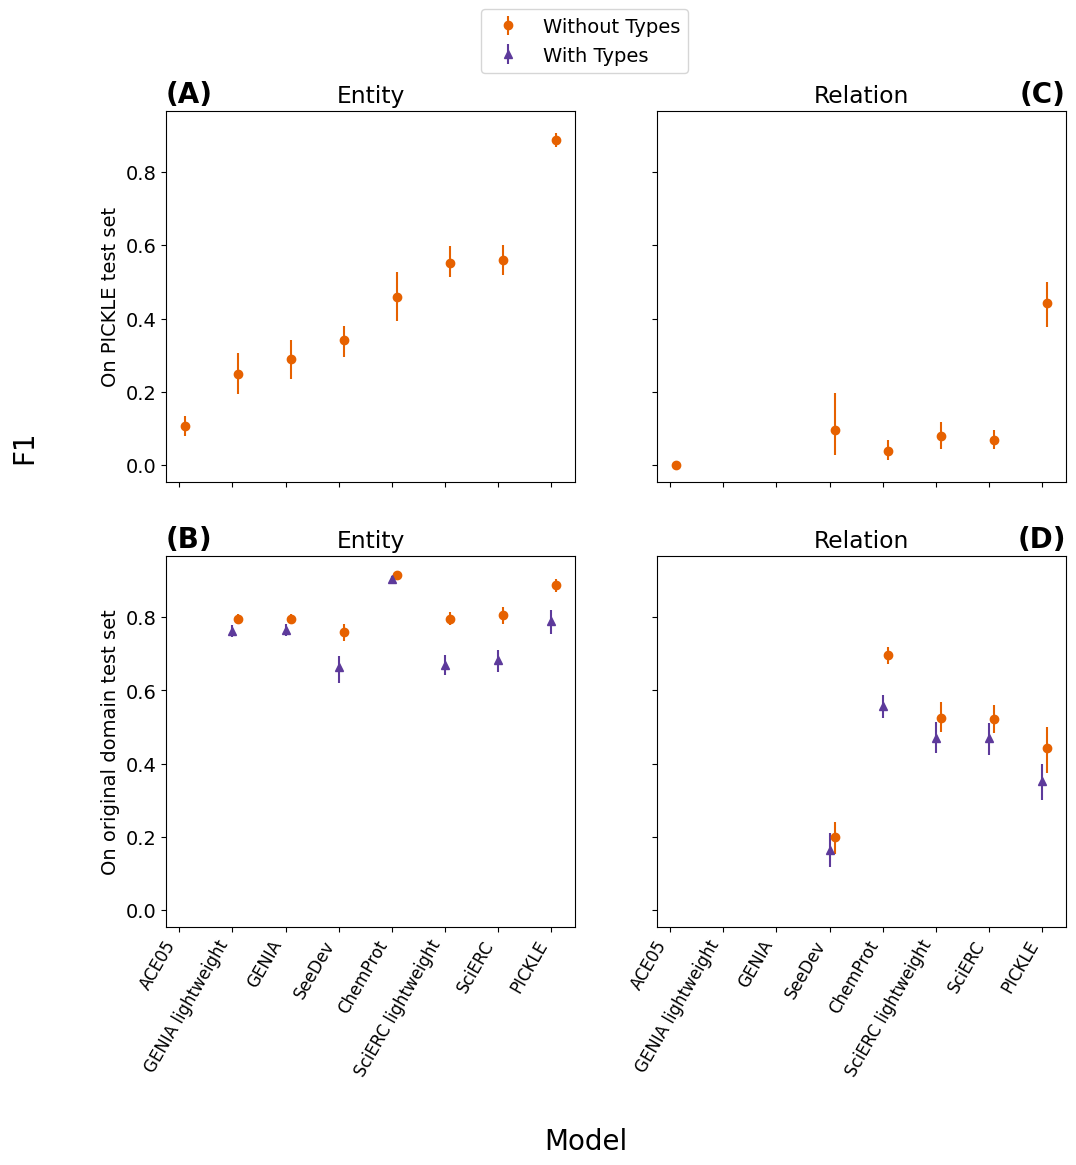

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0,0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_F1"], yerr=no_lab_pick_ent_CIs, fmt="o", color='#E66100')

axs[0,1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_F1"], yerr=no_lab_pick_rel_CIs, fmt="o", color='#E66100', label='Without Types')

axs[1,0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_F1"], yerr=no_lab_orig_ent_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_F1"], yerr=lab_orig_ent_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_F1"], yerr=no_lab_orig_rel_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_F1"], yerr=lab_orig_rel_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1,1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[0,0].set_title('Entity')
axs[0,0].set_title('(A)', fontsize='20', fontweight='bold', loc='left')
axs[0,1].set_title('Relation')
axs[0,1].set_title('(C)', fontsize='20', fontweight='bold', loc='right')
axs[1,0].set_title('Entity')
axs[1,0].set_title('(B)', fontsize='20', fontweight='bold', loc='left')
axs[1,1].set_title('Relation')
axs[1,1].set_title('(D)', fontsize='20', fontweight='bold', loc='right')
axs[0,0].set_ylabel('On PICKLE test set')
axs[1,0].set_ylabel('On original domain test set')
axs[1,0].legend(bbox_to_anchor=(1.3,2.5))
fig.supxlabel('Model', size=20)
fig.supylabel('F1', y=0.6,  size=20)
fig.subplots_adjust(bottom=0.2, left=0.15)

plt.savefig('../data/straying_off_topic_data/final_figures_PICKLE/figure_5.png', format='png', dpi=600)

#### Precision

In [16]:
no_lab_pick_ent_prec_CIs, no_lab_pick_rel_prec_CIs = process_CIs(dygiepp_no_labels_perf, kind='precision')
no_lab_orig_ent_prec_CIs, no_lab_orig_rel_prec_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df, kind='precision')
lab_orig_ent_prec_CIs, lab_orig_rel_prec_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df, kind='precision')

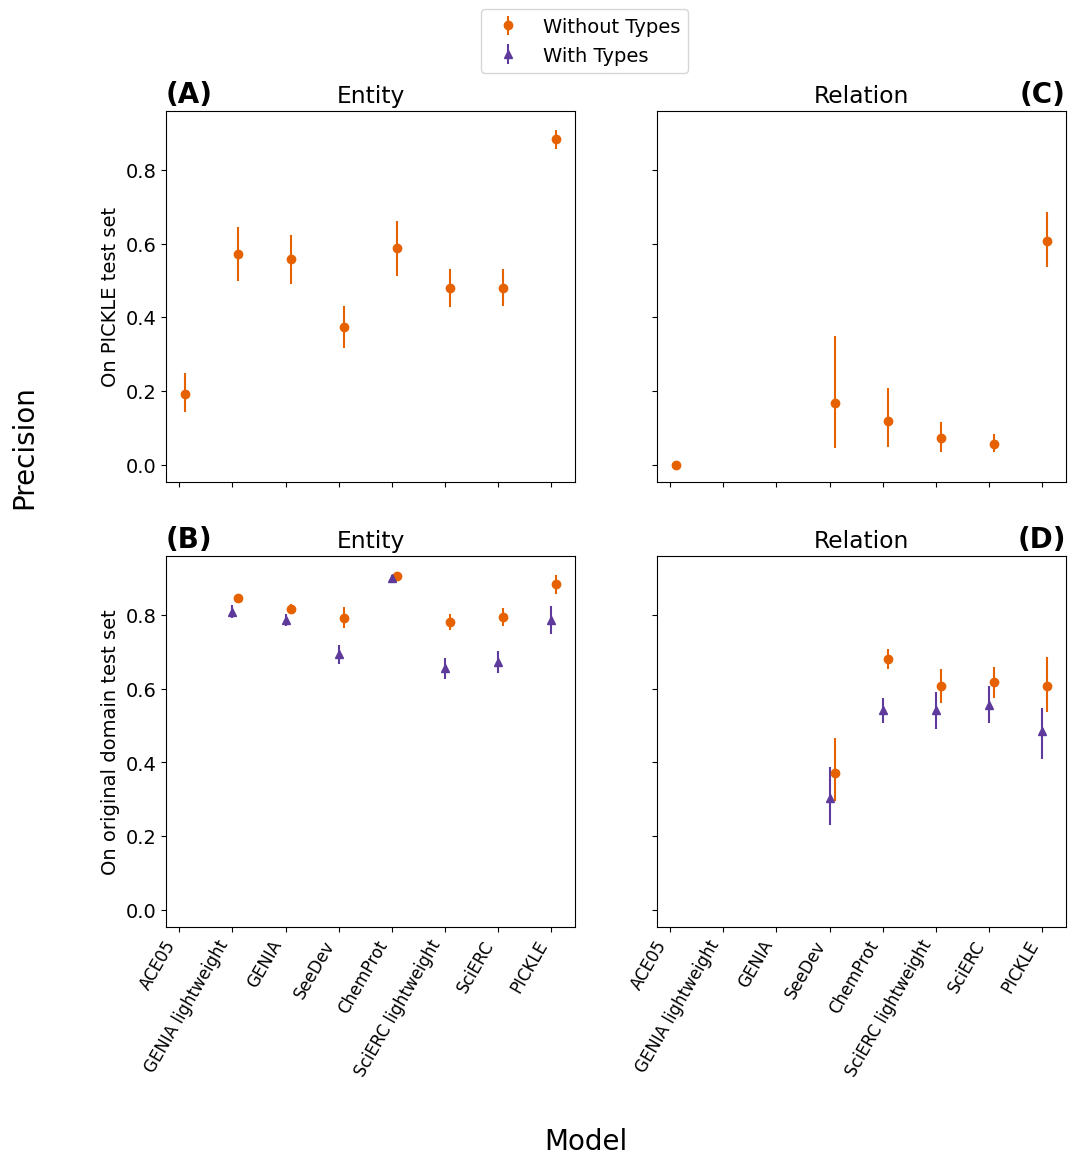

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0,0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_precision"], yerr=no_lab_pick_ent_prec_CIs, fmt="o", color='#E66100')

axs[0,1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_precision"], yerr=no_lab_pick_rel_prec_CIs, fmt="o", color='#E66100', label='Without Types')

axs[1,0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_precision"], yerr=no_lab_orig_ent_prec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_precision"], yerr=lab_orig_ent_prec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_precision"], yerr=no_lab_orig_rel_prec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_precision"], yerr=lab_orig_rel_prec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1,1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[0,0].set_title('Entity')
axs[0,0].set_title('(A)', fontsize='20', fontweight='bold', loc='left')
axs[0,1].set_title('Relation')
axs[0,1].set_title('(C)', fontsize='20', fontweight='bold', loc='right')
axs[1,0].set_title('Entity')
axs[1,0].set_title('(B)', fontsize='20', fontweight='bold', loc='left')
axs[1,1].set_title('Relation')
axs[1,1].set_title('(D)', fontsize='20', fontweight='bold', loc='right')
axs[0,0].set_ylabel('On PICKLE test set')
axs[1,0].set_ylabel('On original domain test set')
axs[1,0].legend(bbox_to_anchor=(1.3,2.5))
fig.supxlabel('Model', size=20)
fig.supylabel('Precision', y=0.6,  size=20)
fig.subplots_adjust(bottom=0.2, left=0.15)

plt.savefig('../data/straying_off_topic_data/final_figures_PICKLE/figure_S2.png', format='png', dpi=600)

#### Recall

In [18]:
no_lab_pick_ent_rec_CIs, no_lab_pick_rel_rec_CIs = process_CIs(dygiepp_no_labels_perf, kind='recall')
no_lab_orig_ent_rec_CIs, no_lab_orig_rel_rec_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df, kind='recall')
lab_orig_ent_rec_CIs, lab_orig_rel_rec_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df, kind='recall')

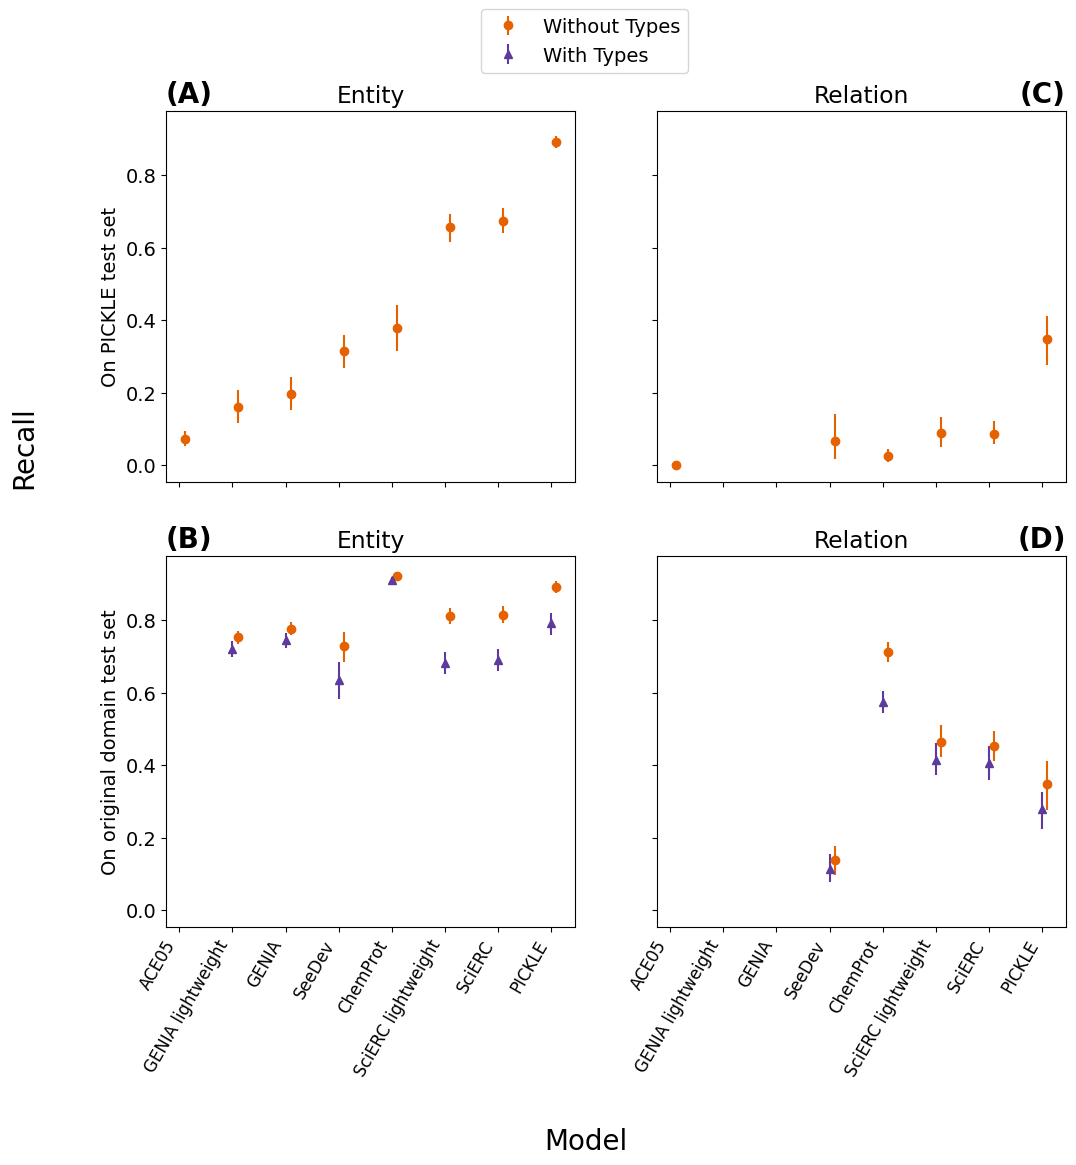

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0,0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_recall"], yerr=no_lab_pick_ent_rec_CIs, fmt="o", color='#E66100')

axs[0,1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_recall"], yerr=no_lab_pick_rel_rec_CIs, fmt="o", color='#E66100', label='Without Types')

axs[1,0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_recall"], yerr=no_lab_orig_ent_rec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_recall"], yerr=lab_orig_ent_rec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_recall"], yerr=no_lab_orig_rel_rec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1,1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_recall"], yerr=lab_orig_rel_rec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1,0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1,1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[0,0].set_title('Entity')
axs[0,0].set_title('(A)', fontsize='20', fontweight='bold', loc='left')
axs[0,1].set_title('Relation')
axs[0,1].set_title('(C)', fontsize='20', fontweight='bold', loc='right')
axs[1,0].set_title('Entity')
axs[1,0].set_title('(B)', fontsize='20', fontweight='bold', loc='left')
axs[1,1].set_title('Relation')
axs[1,1].set_title('(D)', fontsize='20', fontweight='bold', loc='right')
axs[0,0].set_ylabel('On PICKLE test set')
axs[1,0].set_ylabel('On original domain test set')
axs[1,0].legend(bbox_to_anchor=(1.3,2.5))
fig.supxlabel('Model', size=20)
fig.supylabel('Recall', y=0.6,  size=20)
fig.subplots_adjust(bottom=0.2, left=0.15)

plt.savefig('../data/straying_off_topic_data/final_figures_PICKLE/figure_S3.png', format='png', dpi=600)

## Tables
I want to get the numeric values of all performances for inclusion in supplemental.

In [23]:
dygiepp_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model,x
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.193694,0.072919,0.105819,0.000000,0.000000,0.000000,"(0.1429979253112033, 0.2502936241610738)","(0.05333745205549978, 0.09474637681159417)","(0.07839296166227686, 0.13527554548482587)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",ace05-relation,0
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.570708,0.160570,0.249894,NaN,NaN,NaN,"(0.49902699456975774, 0.643936419763142)","(0.11667512308468143, 0.20724809293513485)","(0.19321837835989722, 0.3061844812816278)","(0,0)","(0,0)","(0,0)",genia-lightweight,1
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.557187,0.196518,0.289868,NaN,NaN,NaN,"(0.4912152530292231, 0.6242472804972805)","(0.1523317471518495, 0.24312158926383784)","(0.23576190476190473, 0.3419524854981555)","(0,0)","(0,0)","(0,0)",genia,2
3,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.373344,0.314438,0.340887,0.167352,0.066984,0.094928,"(0.31789976918733104, 0.4304071630210769)","(0.26929228179228176, 0.35934436835687483)","(0.29586052643654476, 0.3803187764879307)","(0.04750056420672534, 0.349972186904005)","(0.017564797672573393, 0.14164540816326524)","(0.0264594334393325, 0.19697090527267153)",seedev,3
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.589271,0.377282,0.459691,0.118089,0.023735,0.039048,"(0.5134214210792485, 0.6597671470822966)","(0.31619556173564173, 0.4429260106656407)","(0.3932587830568571, 0.5283259376302464)","(0.04967592592592593, 0.20930232558139536)","(0.007501830573391912, 0.04328817733990146)","(0.013247961852022767, 0.06758396923631556)",chemprot,4
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478597,0.656190,0.553169,0.072374,0.089572,0.079652,"(0.4294379741252424, 0.5316811214758135)","(0.6164612612449871, 0.691908914545175)","(0.5141514693449252, 0.5977567158569393)","(0.03612494415231811, 0.11568160175684078)","(0.04887108610567514, 0.13172888094778185)","(0.042886436544521116, 0.1180061037639878)",scierc-lightweight,5
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478968,0.674144,0.559745,0.057466,0.086344,0.068621,"(0.43032869912059807, 0.5308687868236084)","(0.6406513153003568, 0.7108491030638333)","(0.5190181925003347, 0.6002697495183045)","(0.03457632090684005, 0.08541554231822657)","(0.057188308886971524, 0.12067924528301884)","(0.044473370023383384, 0.09702656546489562)",scierc,6
7,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle,7


In [24]:
for_table_dygiep_no_label_on_pickle = dygiepp_no_labels_perf.drop(columns=['pred_file', 'gold_std_file', 'x'])
for_table_dygiep_no_label_on_pickle

,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,0.193694,0.072919,0.105819,0.000000,0.000000,0.000000,"(0.1429979253112033, 0.2502936241610738)","(0.05333745205549978, 0.09474637681159417)","(0.07839296166227686, 0.13527554548482587)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",ace05-relation
1,0.570708,0.160570,0.249894,NaN,NaN,NaN,"(0.49902699456975774, 0.643936419763142)","(0.11667512308468143, 0.20724809293513485)","(0.19321837835989722, 0.3061844812816278)","(0,0)","(0,0)","(0,0)",genia-lightweight
2,0.557187,0.196518,0.289868,NaN,NaN,NaN,"(0.4912152530292231, 0.6242472804972805)","(0.1523317471518495, 0.24312158926383784)","(0.23576190476190473, 0.3419524854981555)","(0,0)","(0,0)","(0,0)",genia
3,0.373344,0.314438,0.340887,0.167352,0.066984,0.094928,"(0.31789976918733104, 0.4304071630210769)","(0.26929228179228176, 0.35934436835687483)","(0.29586052643654476, 0.3803187764879307)","(0.04750056420672534, 0.349972186904005)","(0.017564797672573393, 0.14164540816326524)","(0.0264594334393325, 0.19697090527267153)",seedev
4,0.589271,0.377282,0.459691,0.118089,0.023735,0.039048,"(0.5134214210792485, 0.6597671470822966)","(0.31619556173564173, 0.4429260106656407)","(0.3932587830568571, 0.5283259376302464)","(0.04967592592592593, 0.20930232558139536)","(0.007501830573391912, 0.04328817733990146)","(0.013247961852022767, 0.06758396923631556)",chemprot
5,0.478597,0.656190,0.553169,0.072374,0.089572,0.079652,"(0.4294379741252424, 0.5316811214758135)","(0.6164612612449871, 0.691908914545175)","(0.5141514693449252, 0.5977567158569393)","(0.03612494415231811, 0.11568160175684078)","(0.04887108610567514, 0.13172888094778185)","(0.042886436544521116, 0.1180061037639878)",scierc-lightweight
6,0.478968,0.674144,0.559745,0.057466,0.086344,0.068621,"(0.43032869912059807, 0.5308687868236084)","(0.6406513153003568, 0.7108491030638333)","(0.5190181925003347, 0.6002697495183045)","(0.03457632090684005, 0.08541554231822657)","(0.057188308886971524, 0.12067924528301884)","(0.044473370023383384, 0.09702656546489562)",scierc
7,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle


In [25]:
# Map model column to semantic names
for_table_dygiep_no_label_on_pickle = for_table_dygiep_no_label_on_pickle.replace({'model': label_key})
# Combine estimated and their CIs with only 2 decimal points in a single column
cols_to_drop = []
for typ in ['ent', 'rel']:
    semantic_typ = 'Entity' if typ == 'ent' else 'Relation'
    for k in ['F1', 'precision', 'recall']:
        cols_to_drop.extend([f'{typ}_{k}_CI', f'{typ}_{k}'])
        semantic_k = 'F1' if k == 'F1' else k.capitalize() 
        estimate_col = for_table_dygiep_no_label_on_pickle[f'{typ}_{k}'].round(2).replace({np.nan: '--'})
        ci_col = for_table_dygiep_no_label_on_pickle[f'{typ}_{k}_CI']
        ci_col = ci_col.apply(lambda x: ' to '.join([str(round(i, 2)) for i in literal_eval(str(x))])).replace({'0 to 0': ''})
        joiner = pd.Series([', ' if estimate_col[i] != '--' else '' for i in range(len(estimate_col))])
        joined_col = estimate_col.astype(str) + joiner + ci_col
        for_table_dygiep_no_label_on_pickle[f'{semantic_typ} {semantic_k}'] = joined_col
for_table_dygiep_no_label_on_pickle = for_table_dygiep_no_label_on_pickle.rename(columns={'model': 'Model'})
for_table_dygiep_no_label_on_pickle = for_table_dygiep_no_label_on_pickle.drop(columns=cols_to_drop)
for_table_dygiep_no_label_on_pickle

,Model,Entity F1,Entity Precision,Entity Recall,Relation F1,Relation Precision,Relation Recall
0,ACE05,"0.11, 0.08 to 0.14","0.19, 0.14 to 0.25","0.07, 0.05 to 0.09","0.0, 0.0 to 0.0","0.0, 0.0 to 0.0","0.0, 0.0 to 0.0"
1,GENIA lightweight,"0.25, 0.19 to 0.31","0.57, 0.5 to 0.64","0.16, 0.12 to 0.21",--,--,--
2,GENIA,"0.29, 0.24 to 0.34","0.56, 0.49 to 0.62","0.2, 0.15 to 0.24",--,--,--
3,SeeDev,"0.34, 0.3 to 0.38","0.37, 0.32 to 0.43","0.31, 0.27 to 0.36","0.09, 0.03 to 0.2","0.17, 0.05 to 0.35","0.07, 0.02 to 0.14"
4,ChemProt,"0.46, 0.39 to 0.53","0.59, 0.51 to 0.66","0.38, 0.32 to 0.44","0.04, 0.01 to 0.07","0.12, 0.05 to 0.21","0.02, 0.01 to 0.04"
5,SciERC lightweight,"0.55, 0.51 to 0.6","0.48, 0.43 to 0.53","0.66, 0.62 to 0.69","0.08, 0.04 to 0.12","0.07, 0.04 to 0.12","0.09, 0.05 to 0.13"
6,SciERC,"0.56, 0.52 to 0.6","0.48, 0.43 to 0.53","0.67, 0.64 to 0.71","0.07, 0.04 to 0.1","0.06, 0.03 to 0.09","0.09, 0.06 to 0.12"
7,PICKLE,"0.89, 0.87 to 0.91","0.88, 0.86 to 0.91","0.89, 0.88 to 0.91","0.44, 0.38 to 0.5","0.61, 0.54 to 0.69","0.35, 0.28 to 0.41"


In [26]:
for_table_no_label_on_orig = original_dom_no_label_eval_dygiepp_all_df.drop(columns=['pred_file', 'gold_std_file', 'x'])

In [27]:
# Map model column to semantic names
for_table_no_label_on_orig = for_table_no_label_on_orig.replace({'model': label_key})
# Combine estimated and their CIs with only 2 decimal points in a single column
cols_to_drop = []
for typ in ['ent', 'rel']:
    semantic_typ = 'Entity' if typ == 'ent' else 'Relation'
    for k in ['F1', 'precision', 'recall']:
        cols_to_drop.extend([f'{typ}_{k}_CI', f'{typ}_{k}'])
        semantic_k = 'F1' if k == 'F1' else k.capitalize() 
        estimate_col = for_table_no_label_on_orig[f'{typ}_{k}'].round(2).replace({np.nan: '--'})
        ci_col = for_table_no_label_on_orig[f'{typ}_{k}_CI']
        ci_col = ci_col.apply(lambda x: ' to '.join([str(round(i, 2)) for i in literal_eval(str(x))])).replace({'0 to 0': ''})
        joiner = pd.Series([', ' if estimate_col[i] != '--' else '' for i in range(len(estimate_col))])
        joined_col = estimate_col.astype(str) + joiner + ci_col
        for_table_no_label_on_orig[f'{semantic_typ} {semantic_k}'] = joined_col
for_table_no_label_on_orig = for_table_no_label_on_orig.rename(columns={'model': 'Model'})
for_table_no_label_on_orig = for_table_no_label_on_orig.drop(columns=cols_to_drop)
for_table_no_label_on_orig

,Model,Entity F1,Entity Precision,Entity Recall,Relation F1,Relation Precision,Relation Recall
0,SeeDev,"0.76, 0.74 to 0.78","0.79, 0.76 to 0.82","0.73, 0.69 to 0.77","0.2, 0.15 to 0.24","0.37, 0.3 to 0.47","0.14, 0.1 to 0.18"
1,GENIA,"0.8, 0.78 to 0.81","0.82, 0.8 to 0.83","0.78, 0.76 to 0.79",--,--,--
2,GENIA lightweight,"0.8, 0.78 to 0.81","0.84, 0.83 to 0.86","0.75, 0.74 to 0.77",--,--,--
3,SciERC lightweight,"0.8, 0.78 to 0.82","0.78, 0.76 to 0.8","0.81, 0.79 to 0.83","0.53, 0.49 to 0.57","0.61, 0.56 to 0.65","0.46, 0.42 to 0.51"
4,SciERC,"0.81, 0.78 to 0.83","0.8, 0.77 to 0.82","0.82, 0.79 to 0.84","0.52, 0.48 to 0.56","0.62, 0.58 to 0.66","0.45, 0.41 to 0.49"
5,PICKLE,"0.89, 0.87 to 0.91","0.88, 0.86 to 0.91","0.89, 0.88 to 0.91","0.44, 0.38 to 0.5","0.61, 0.54 to 0.69","0.35, 0.28 to 0.41"
6,ChemProt,"0.91, 0.91 to 0.92","0.91, 0.9 to 0.91","0.92, 0.92 to 0.93","0.7, 0.67 to 0.72","0.68, 0.65 to 0.71","0.71, 0.69 to 0.74"


In [28]:
for_table_label_on_orig = original_dom_typed_eval_dygiepp_all_df.drop(columns=['pred_file', 'gold_std_file', 'x'])

In [29]:
# Map model column to semantic names
for_table_label_on_orig = for_table_label_on_orig.replace({'model': label_key})
# Combine estimated and their CIs with only 2 decimal points in a single column
cols_to_drop = []
for typ in ['ent', 'rel']:
    semantic_typ = 'Entity' if typ == 'ent' else 'Relation'
    for k in ['F1', 'precision', 'recall']:
        cols_to_drop.extend([f'{typ}_{k}_CI', f'{typ}_{k}'])
        semantic_k = 'F1' if k == 'F1' else k.capitalize() 
        estimate_col = for_table_label_on_orig[f'{typ}_{k}'].round(2).replace({np.nan: '--'})
        ci_col = for_table_label_on_orig[f'{typ}_{k}_CI']
        ci_col = ci_col.apply(lambda x: ' to '.join([str(round(i, 2)) for i in literal_eval(str(x))])).replace({'0 to 0': ''})
        joiner = pd.Series([', ' if estimate_col[i] != '--' else '' for i in range(len(estimate_col))])
        joined_col = estimate_col.astype(str) + joiner + ci_col
        for_table_label_on_orig[f'{semantic_typ} {semantic_k}'] = joined_col
for_table_label_on_orig = for_table_label_on_orig.rename(columns={'model': 'Model'})
for_table_label_on_orig = for_table_label_on_orig.drop(columns=cols_to_drop)
for_table_label_on_orig

,Model,Entity F1,Entity Precision,Entity Recall,Relation F1,Relation Precision,Relation Recall
0,SeeDev,"0.66, 0.62 to 0.69","0.69, 0.67 to 0.72","0.64, 0.58 to 0.68","0.16, 0.12 to 0.21","0.3, 0.23 to 0.39","0.11, 0.08 to 0.15"
1,SciERC lightweight,"0.67, 0.64 to 0.7","0.66, 0.63 to 0.68","0.68, 0.65 to 0.71","0.47, 0.43 to 0.51","0.54, 0.49 to 0.59","0.41, 0.37 to 0.46"
2,SciERC,"0.68, 0.65 to 0.71","0.67, 0.64 to 0.7","0.69, 0.66 to 0.72","0.47, 0.42 to 0.51","0.56, 0.51 to 0.61","0.41, 0.36 to 0.45"
3,GENIA lightweight,"0.76, 0.74 to 0.78","0.81, 0.79 to 0.83","0.72, 0.7 to 0.74",--,--,--
4,GENIA,"0.76, 0.75 to 0.78","0.78, 0.77 to 0.8","0.75, 0.72 to 0.76",--,--,--
5,PICKLE,"0.79, 0.76 to 0.82","0.79, 0.75 to 0.82","0.79, 0.76 to 0.82","0.35, 0.3 to 0.4","0.49, 0.41 to 0.55","0.28, 0.22 to 0.33"
6,ChemProt,"0.91, 0.9 to 0.91","0.9, 0.89 to 0.91","0.91, 0.9 to 0.92","0.56, 0.53 to 0.59","0.54, 0.51 to 0.58","0.58, 0.55 to 0.61"
